# Import general classes

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle
import os
import sys
import pylab
import matplotlib.pyplot as plt

# Import DLITE classes

We import 8 classes -  node, edge, cell, colony, data, ManualTracing, ManualTracingMultiple, SurfaceEvolver

Node defines (x,y) location of all edge-edge intersections

Edge defines co-ordinates, directed curvature and end nodes of all cell-cell intersections

Cell defines perimeter, area and all edges and nodes comprising a cycle of edges

Colony defines all cells in a given image 

Data defines a colony from pickle file formats generated at AICS

ManualTracing defines a colony from Manual tracing of images generated using NeuronJ 

ManualTracingMultiple defines colonies at multiple time points each of which is manually traced out using NeuronJ

SurfaceEvolver defines colonies from multiple txt files generated from Surface Evolver 

In [2]:
from DLITE.cell_describe import node, edge, cell, colony
from DLITE.ManualTracingMultiple import ManualTracingMultiple
from DLITE.SurfaceEvolver import SurfaceEvolver
from DLITE.PlottingFunctions import PlottingFunctions

# Define the dataset

SurfaceEvolver can read txt files of the form (name_first + number + name_end). For example, name_first = 'voronoi_very_small_44_edges_tension_edges_20_30_', number = 0.9, name_end = '.fe.txt' is a txt file with the name 
'voronoi_very_small_44_edges_tension_edges_20_30_0.9.fe.txt'. Here, we have 10 timepoints.

In [3]:
os.chdir(r'../Notebooks/data/Synthetic_data/Fig_5')
timepoints = [int(i)/10 for i in np.linspace(10, 3, 7)]
name_first = 'voronoi_very_small_44_edges_tension_edges_20_30_'
name_end = '.fe.txt'

In [4]:
timepoints

[1.0, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3]

In [5]:
SurfaceEvolverInstance = SurfaceEvolver(name_first, name_end)

# Computation

Given timepoints and an instance of the SurfaceEvolver class, we can compute dynamic cell-cell forces and store it in a dictionary named colonies as follows

In [6]:
colonies = SurfaceEvolverInstance.computation_based_on_prev_surface_evolver(timepoints, colonies = None, index = None, 
                                          old_dictionary = None, maxiter = 60*1000, solver = 'DLITE')

Name is voronoi_very_small_44_edges_tension_edges_20_30_1.0.fe.txt
Number of fit edges: 25
Number of cells 2 2
guess tension is [0.05, 0.4, 0.32, 0.56, 0.62, 0.27, 0.64, 0.63, 0.02, 0.67, 0.22, 0.86, 0.57, 0.76, 0.13, 0.69, 0.58, 0.59, 0.18, 0.15, 0.51, 0.69, 0.14, 0.85, 0.55]
Function value 0.010564751266176809
Solution [0.5906006  0.59448586 0.58950839 0.5910959  0.58886322 0.59049502
 0.59077354 0.59265611 0.58294638 0.58747962 0.58740277 0.57787733
 0.59664487 0.58997209 0.58971762 0.60107719 0.59142384 0.58738081
 0.58263115 0.57916037 0.58373003 0.58518747 0.5963707  0.58050469
 0.593009  ]


-----------------------------
guess pressure is [0.0013469521308886317, 0.0013469521308886317]
Function value 3.612207055816619e-23
Solution [0.00080376 0.00189014]


-----------------------------
Solver is DLITE
First colony {'0': <DLITE.cell_describe.colony object at 0x12158bfd0>}
Number now is 0.8
Number of fit edges: 25
Number of cells 2 2
guess tension is [0.5906005951578338, 0.59448585

/Users/ritvikvasan/Documents/repos/DLITE/DLITE/cell_describe.py:1321: RuntimeWarning: invalid value encountered in double_scalars
  objective = objective + resid_mag + coeff * resid_mag/np.sum(tension_vec_mags)


Function value nan
Solution [0.69540747 0.69938424 0.69394773 0.70371372 0.6930407  0.69591471
 0.70173339 0.44312165 0.39976676 0.42024854 0.41820683 0.39867514
 0.43912928 0.42380423 0.40866694 0.43839442 0.70602351 0.68808368
 0.68563306 0.68208895 0.68476566 0.68332437 0.69875497 0.67924683
 0.69369673]


-----------------------------
guess pressure is [0.01348763982042462, 0.01348763982042462]
Function value 7.188086959911588e-20
Solution [0.00383134 0.02314393]


-----------------------------
Next colony number 3
Number now is 0.5
Number of fit edges: 25
Number of cells 2 2
guess tension is [0.6954074653879426, 0.6993842442265817, 0.6939477315829097, 0.7037137153494123, 0.6930407040664117, 0.695914708922071, 0.7017333872035864, 0.4431216478093743, 0.3997667595452548, 0.4202485446167898, 0.41820682833702066, 0.39867514159900735, 0.4391292759272465, 0.4238042292481564, 0.4086669366526904, 0.4383944228942818, 0.7060235131793807, 0.6880836810126325, 0.6856330630118087, 0.682088946032

Now we have 7 colony classes for each time point

In [7]:
colonies

{'0': <DLITE.cell_describe.colony at 0x12158bfd0>,
 '1': <DLITE.cell_describe.colony at 0x1235e9fd0>,
 '2': <DLITE.cell_describe.colony at 0x123603fd0>,
 '3': <DLITE.cell_describe.colony at 0x123639f98>,
 '4': <DLITE.cell_describe.colony at 0x123691e48>,
 '5': <DLITE.cell_describe.colony at 0x123699438>,
 '6': <DLITE.cell_describe.colony at 0x121571198>}

# Post processing

We want to store all the information contained in colonies. We do this in 4 dataframes

nodes_dataframe has node related information like tension residuals, numbers of connected edges, average curvature of connected edges etc. 

edges_dataframe has edge related information like edge tension, stochasticity in tension, edge curvature etc. 

cells_dataframe has cell related information like cell pressure, area, perimeter etc. 

In [8]:
PlottingFunctionsInstance = PlottingFunctions()

In [9]:
# We first find labels of edges that are present in all the colonies

common_edge_labels = PlottingFunctionsInstance.get_repeat_edge(colonies)
common_cell_labels = PlottingFunctionsInstance.get_repeat_cell(colonies)

In [10]:
#Make the dataframes

edges_dataframe, cells_dataframe = PlottingFunctionsInstance.seaborn_plot(None, colonies,
                                                                                  common_edge_labels,
                                                                                  common_cell_labels,
                                                                                  ground_truth = True)
nodes_dataframe = PlottingFunctionsInstance.seaborn_nodes_dataframe(colonies, None)


## Heatmaps

Since we are doing SurfaceEvolver simulations, we know the ground truth. So we can plot them side by side

In [11]:
tension_table = edges_dataframe.pivot_table(
        values='Local_normalized_tensions', 
        index=['Edge_Labels'], 
        columns='Time')

ground_truth_tension_table = edges_dataframe.pivot_table(
        values='Ground_truth', 
        index=['Edge_Labels'], 
        columns='Time')

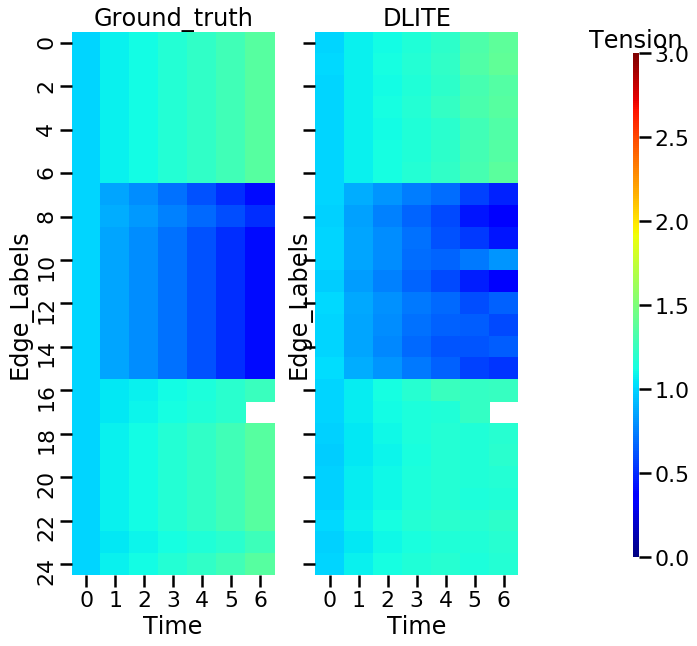

In [12]:
sns.set_context('poster')
%matplotlib inline
fig, axn = plt.subplots(1, 2, figsize = (8,10),sharey=True)
cbar_ax = fig.add_axes([1.1, .15, .01, .7], title = 'Tension')

for i, ax in enumerate(axn.flat):
    if i == 0:
        df = ground_truth_tension_table
        title = 'Ground_truth'
    elif i == 1:
        df = tension_table
        title = 'DLITE'
    ax.set_title(title)
    sns.heatmap(df, ax=ax,
                cbar=i == 0, vmin=0, vmax=3, cmap = 'jet',
                cbar_ax=None if i else cbar_ax)

## Colony colormaps

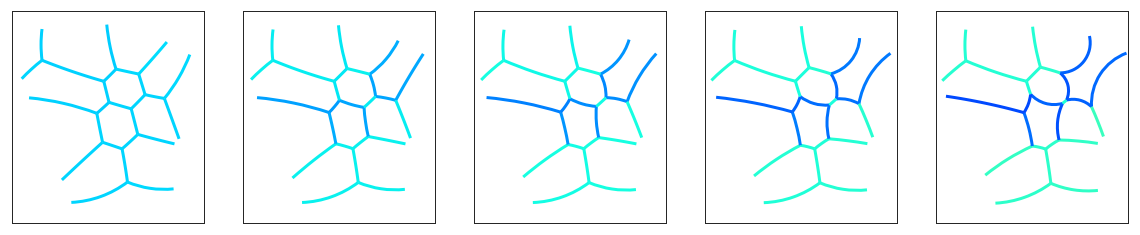

In [13]:
# Plot 
import pylab
import matplotlib.pyplot as plt


sns.set(style="white")
sns.set_context("paper", font_scale = 2.5)

total = 5
fig, axn = plt.subplots(1, total, figsize = (20,20),sharey=True)
nums= [0,1,2,3,4]

for i, ax in enumerate(axn.flat):
    col = colonies[str(nums[i])]
    tensions = [e.tension for e in col.tot_edges]
    mean_ten = np.mean(tensions)
    tensions = [e/mean_ten for e in tensions]

    col.plot_tensions(ax, fig, tensions, min_x=450, max_x=550, min_y=430, max_y=550, 
                      min_ten = 0, max_ten = 3, specify_color = 'jet',cbar = 'no', lw = 3)
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.setp(ax.get_xticklabels(), visible=False)
    ax.set(xlim = [450,550], ylim = [430,540], aspect = 1)

# pylab.savefig('geometry.pdf', bbox_inches = 'tight')
# pylab.savefig('geometry.svg', bbox_inches = 'tight')

## Tension movies

In [15]:
sns.set(style="darkgrid")
sns.set_context("talk", font_scale=0.75)

fig, ax = plt.subplots(1,1, figsize = (6,4))
PlottingFunctionsInstance.plot_tensions(fig, ax, colonies,min_x=450, max_x=550, min_y=430, max_y=550, 
                                            min_ten=0,max_ten=3, specify_aspect=None,specify_color='jet' ,
                                            type=None, lw = 2)